In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
ROOT_FOLDER = '/content/drive/MyDrive/'

In [60]:
# data is now our pandas DataFrame containing all of the data from our csv file
df = pd.read_csv(ROOT_FOLDER + "eviction_num_by_muni.csv",index_col=0)

In [5]:
# data is now our pandas DataFrame containing all of the data from our csv file
# household = pd.read_csv(ROOT_FOLDER + "household_normalization.csv",index_col=0)

In [61]:
# data is now our pandas DataFrame containing all of the data from our csv file
household = pd.read_csv(ROOT_FOLDER + "household_normalization.csv",index_col=0)

In [62]:
household

,Muni,Eviction Numbers,Total Households,Renter Occupied Pct,Renter Occupied,Evictions per Rented Households
0,Worcester,3743,71595,58.7,42026,0.089064
1,Springfield,2983,56358,53.4,30095,0.099119
2,Fall River,2355,38456,63.7,24496,0.096138
3,New Bedford,2282,38888,59.8,23255,0.098129
4,Lowell,1741,39421,57.7,22745,0.076544
5,Brockton,1507,31817,45.0,14317,0.105259
6,Boston,1392,269522,65.0,175189,0.007946
7,Lynn,1205,32599,55.1,17962,0.067086
8,Lawrence,1194,25959,69.0,17911,0.066663
9,Framingham,1154,28222,46.1,13010,0.088701


In [68]:
#poverty per household per municipality
poverty = pd.read_csv(ROOT_FOLDER+'ACSST5Y2019CITY.csv',skiprows=1)

cdf = pd.read_csv(ROOT_FOLDER+'eviction_num_by_muni.csv')

counts = cdf[cdf['property_address_city'].isin(household['Muni'])]
counts.rename(columns={'property_address_city':'Muni','eviction_num':'Eviction Numbers'},inplace=True)

# #data cleaning function 1
def df_clean(df):
    muni_list = []
    for x in range(df.shape[0]):
        wsplit = []
        wsplit = df.iloc[x]['Geographic Area Name'].split()
        word = ' '
        reject_list = ['town','Town','city','City','city,','City,','town,','Town,', 'CDP,', 'Massachusetts', 'Center', 'Port']
        for w in wsplit:
            if w in reject_list:
                break
            else:    
                word += ' ' + w 
        muni_list.append(word)    
    df['Geographic Area Name'] = muni_list
    df['Geographic Area Name'] = df['Geographic Area Name'].str.lstrip()
    df['Geographic Area Name'] = df['Geographic Area Name'].str.rstrip()    
    
    return df

#data cleaning function 2
def keep_estimates(idf):
    boolCols = idf.columns.str.contains('Estimate')
    newCols = list(idf.columns[0:2])
    for col in range(2,len(boolCols)):
        if boolCols[col] == True:
            newCols.append(idf.columns[col])
    df = idf[newCols]
    
    return df

poverty = df_clean(keep_estimates(poverty));
counts = pd.merge(counts,household,left_on='Muni',right_on='Muni')
#Merging munis with corresponding socio-economic features
poverty_df =  pd.merge(counts,poverty,left_on='Muni',right_on='Geographic Area Name').drop(columns=['id','Geographic Area Name'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [70]:
poverty_df

,Muni,eviction_num,Eviction Numbers,Total Households,Renter Occupied Pct,Renter Occupied,Evictions per Rented Households,Estimate!!Total!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!18 to 34 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!35 to 64 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!60 years and over,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!65 years and over,Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Male,Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Female,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race),"Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, associate's degree",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed!!Male,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed!!Female,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Unemployed,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Unemployed!!Male,Es

In [46]:
# poverty
# pd.set_option("max_rows", None)

In [71]:
poverty_df

,Muni,eviction_num,Eviction Numbers,Total Households,Renter Occupied Pct,Renter Occupied,Evictions per Rented Households,Estimate!!Total!!Population for whom poverty status is determined,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!18 to 34 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!35 to 64 years,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!60 years and over,Estimate!!Total!!Population for whom poverty status is determined!!AGE!!65 years and over,Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Male,Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Female,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Two or more races,Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Hispanic or Latino origin (of any race),"Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone, not Hispanic or Latino",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than high school graduate,Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, associate's degree",Estimate!!Total!!Population for whom poverty status is determined!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed!!Male,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Employed!!Female,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Unemployed,Estimate!!Total!!Population for whom poverty status is determined!!EMPLOYMENT STATUS!!Civilian labor force 16 years and over!!Unemployed!!Male,Es

In [72]:
poverty_df['Poverty Rate'] = poverty_df['Estimate!!Percent below poverty level!!Population for whom poverty status is determined']

In [73]:
#brackets
one_to_ten_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/1kTO10K.csv',skiprows=1)
ten_to_fifty_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/10kTO50K.csv',skiprows=1)
fifty_to_90_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/50kTO90K.csv',skiprows=1)
ninty_to_200_k = pd.read_csv(ROOT_FOLDER+'CS506 - Data Science/90kTO200K.csv',skiprows=1)

In [74]:
income_one_to_ten_k = poverty_df[poverty_df["Muni"].isin(one_to_ten_k.Middleton.append(pd.Series('Middleton')))]
income_ten_to_fifty_k = poverty_df[poverty_df["Muni"].isin(ten_to_fifty_k.Everett.append(pd.Series('Everett')))]
income_fifty_to_90_k = poverty_df[poverty_df["Muni"].isin(fifty_to_90_k['Fall River'].append(pd.Series('Fall River')))]
income_ninty_to_200_k = poverty_df[poverty_df["Muni"].isin(ninty_to_200_k['Worcester'].append(pd.Series('Worcester')))]

In [78]:
low_median_2 = income_ten_to_fifty_k.sort_values('Evictions per Rented Households', ascending=False).head(3).filter(['Muni','Poverty Rate'], axis=1)
top_median_2 = income_ten_to_fifty_k.sort_values('Evictions per Rented Households').head(3).filter(['Muni','Poverty Rate'], axis=1)
median_2 = pd.concat([low_median_2, top_median_2.reindex(index=top_median_2.index[::-1])])

In [44]:
# income_one_to_ten_k['Estimate!!Percent below poverty level!!Population for whom poverty status is determined']

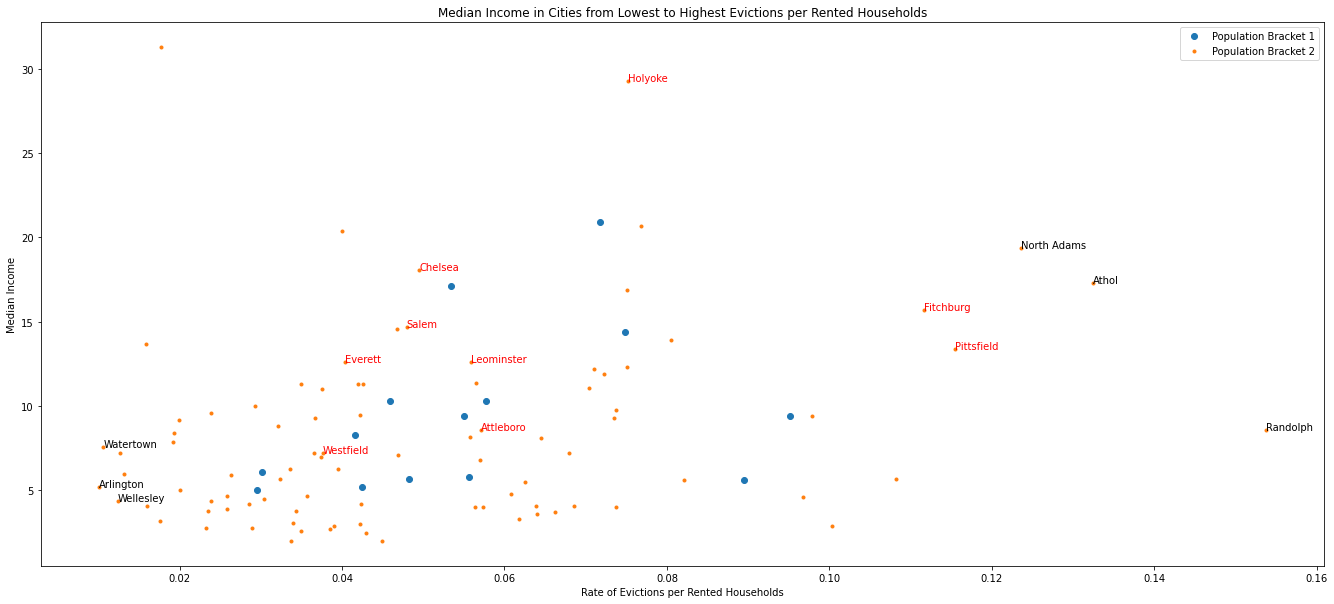

In [79]:
plt.figure(figsize=(23,10))


# rate_income = linear_model.LinearRegression().fit(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]["Median Income"]).tolist())
# regression_line = rate_income.predict(np.array(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'].tolist()).reshape(-1, 1))
plt.plot(income_one_to_ten_k[income_one_to_ten_k[' eviction_num'] >=10]['Evictions per Rented Households'], income_one_to_ten_k[income_one_to_ten_k[' eviction_num'] >=10]["Poverty Rate"], 'o',
             label="Population Bracket 1")
# plt.plot(income_one_to_ten_k[income_one_to_ten_k['eviction_num'] >=10]['Evictions per Rented Households'], regression_line, label='Best Fit Line', color='blue', linewidth=1)
# plt.axhline(y=85204.0, label='Median for Population Bracket 1', color='b', linestyle='-')



# rate_income1 = linear_model.LinearRegression().fit(np.array(income_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1), np.array(income_ten_to_fifty_k["Median Income"]).tolist())
# regression_line1 = rate_income1.predict(np.array(income_ten_to_fifty_k['Evictions per Rented Households'].tolist()).reshape(-1, 1))
# plt.plot(income_ten_to_fifty_k['Evictions per Rented Households'], regression_line1, label='Best Fit Line', color='orange', linewidth=1)
plt.plot(income_ten_to_fifty_k['Evictions per Rented Households'], income_ten_to_fifty_k["Poverty Rate"], '.',
             label="Population Bracket 2")

# plt.axhline(y=96062.0, label='Median for Population Bracket 2', color='orange', linestyle='-')

for city in (median_2["Muni"].tolist()):
  plt.annotate(city, (income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                        income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]["Poverty Rate"]))

gateway_cities = ["Attleboro", "Brockton", "Chelsea", "Chicopee", "Everett", "Fall River", "Fitchburg", "Haverhill", "Holyoke",
                  "Lawrence", "Leominster", "Lowell", "Lynn", "Malden", 
                  "Methuen", "New Bedford", "Peabody", "Pittsfield", "Quincy", "Revere", "Salem", "Springfield", "Taunton", "Westfield", "Worcester"]
for city in gateway_cities: 
  if city in income_ten_to_fifty_k["Muni"].tolist():
    plt.annotate(city, (income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]['Evictions per Rented Households'], 
                            income_ten_to_fifty_k[income_ten_to_fifty_k["Muni"] == city]["Poverty Rate"]), color='Red')

plt.title('Median Income in Cities from Lowest to Highest Evictions per Rented Households', color='black')
plt.xlabel("Rate of Evictions per Rented Households")
plt.ylabel("Median Income")
plt.legend(numpoints=1)
# plt.xlim(0, 1.8);
plt.show()